In [35]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
#Reads crash into Python
#Only keeps columns related to date and time of accident, borough, and number of deaths/injuries
#Data related to number of vehicles, kind of vehicles, etc. is not read into memory
#Lambda commands convert strings into date and time objects

td = pd.read_csv("NYPD_Motor_Vehicle_Collisions_-_Crashes.csv", usecols=[0,1,2,3,10,11,12,13,14,15,16,17], low_memory=False)
td["DATE"] =td["DATE"].apply(lambda x: dt.datetime.strptime(x,"%m/%d/%Y").date())
td["TIME"] =td["TIME"].apply(lambda x: dt.datetime.strptime(x,"%H:%M").time())

In [30]:
td.head(1)

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CRASH EVENTS
0,2019-05-28,13:44:00,MANHATTAN,10022,0.0,0.0,0,0,0,0,0,0,1


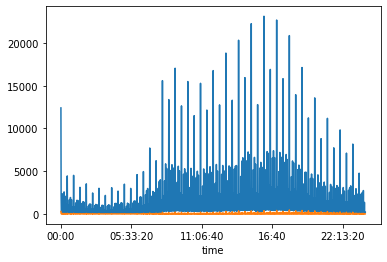

In [34]:
#goal of this plot is vizuluse distrubtion of "Time" to see if values were clustered in odd ways
#suggets times are estimates, but roughly correspond to what one would expect of accident data - i.e. it spikes later in the day
#however, the 00:00 value does NOT match what one would expect - it's far more common then the values that precced
#and follow it
#suggests it served as some kind of place holder and ideally should be modified in some fashion to better reflect data trend
#value can't just be adjusted down - they are real crash events after all
#need to think about this further
td["CRASH EVENTS"]=1
timez = td.groupby(["TIME"]).sum()
timez = timez.reset_index()
timez.sort_values(by=['TIME'],ascending=True)
plt.plot(timez["TIME"],timez['CRASH EVENTS'])

In [38]:
timez["% OF CRASH EVENTS"]= timez['CRASH EVENTS'].apply(lambda x: x/timez['CRASH EVENTS'].sum())

In [3]:
td["MONTH"] =pd.DatetimeIndex(td['DATE']).month
td["YEAR"] =pd.DatetimeIndex(td['DATE']).year
td["HOUR"] =pd.DatetimeIndex(td['TIME']).hour
td["CRASH EVENTS"]=1

In [11]:
help(dt.date.strftime)

Help on method_descriptor:

strftime(...)
    format -> strftime() style string.



<BarContainer object of 1440 artists>

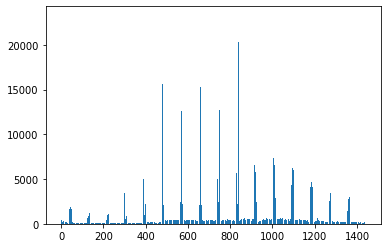

In [4]:
#goal of this table was to vizuluse distrubtion of "Time" to see if values were clustered in odd ways
#suggets times are estimates, but roughly correspond to what one would expect of accident data - i.e. it spikes later in the day
timez = td.groupby(["TIME"]).count()
timez = timez.reset_index()
timez.sort_values(by=['TIME'],ascending=True)
plt.bar(range(len(timez['DATE'])),timez['DATE'])


In [11]:
bymonth = td.groupby(['MONTH','YEAR']).sum()
bymonth["CRASH TO INJURIES"]=bymonth["CRASH EVENTS"]/bymonth["NUMBER OF PERSONS INJURED"]
bymonth["CRASH TO DEATHS"]=bymonth["CRASH EVENTS"]/bymonth["NUMBER OF PERSONS KILLED"]
bymonth.sort_values(by=(['YEAR','MONTH']),ascending=True,inplace=True)
bymonth = bymonth.reset_index()

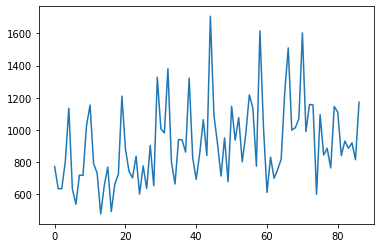

In [44]:
#Ratio of crashs to injuries, from the start of the time series

plt.plot(range(len(bymonth["MONTH"])),bymonth["CRASH TO INJURIES"])

In [36]:
help(plt.Line2D)

Help on class Line2D in module matplotlib.lines:

class Line2D(matplotlib.artist.Artist)
 |  Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |  
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgeco